###
""" Datos generales:
Nombre de la entrega: Actividad Semanal – 5 Repaso Transformación y reducción de dimensiones
Nombre: Rodrigo Rodriguez Rodriguez
Matrícula: A01183284
Materia:Ciencia y analítica de datos (Gpo 10)
Profesor:Maricarmen Vázquez Rojí
Fecha:20/10/2022
"""
###

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

In [2]:
Path=r"https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv"

In [3]:
df=pd.read_csv(Path,sep=",",index_col=0)
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


### Obten la información del DataFrame con los métodos y propiedades

In [4]:
df.shape

(30000, 24)

In [5]:
df.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'Y'],
      dtype='object')

In [6]:
df.head(10)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
6,50000,1.0,1.0,2.0,37.0,0.0,0.0,0.0,0.0,0.0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0.0
7,500000,1.0,1.0,2.0,29.0,0.0,0.0,0.0,0.0,0.0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0.0
8,100000,2.0,2.0,2.0,23.0,0.0,-1.0,-1.0,0.0,0.0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0.0
9,140000,2.0,3.0,1.0,28.0,0.0,0.0,2.0,0.0,0.0,...,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0.0


In [7]:
df.dtypes

X1       int64
X2     float64
X3     float64
X4     float64
X5     float64
X6     float64
X7     float64
X8     float64
X9     float64
X10    float64
X11    float64
X12    float64
X13    float64
X14    float64
X15    float64
X16    float64
X17    float64
X18    float64
X19    float64
X20    float64
X21    float64
X22    float64
X23    float64
Y      float64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      30000 non-null  int64  
 1   X2      29999 non-null  float64
 2   X3      29998 non-null  float64
 3   X4      29998 non-null  float64
 4   X5      29995 non-null  float64
 5   X6      29997 non-null  float64
 6   X7      29995 non-null  float64
 7   X8      29993 non-null  float64
 8   X9      29991 non-null  float64
 9   X10     29984 non-null  float64
 10  X11     29986 non-null  float64
 11  X12     29989 non-null  float64
 12  X13     29989 non-null  float64
 13  X14     29987 non-null  float64
 14  X15     29985 non-null  float64
 15  X16     29983 non-null  float64
 16  X17     29990 non-null  float64
 17  X18     29992 non-null  float64
 18  X19     29991 non-null  float64
 19  X20     29992 non-null  float64
 20  X21     29989 non-null  float64
 21  X22     29989 non-null  float64
 22

In [9]:
df.isna()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
df.isnull().sum()

X1      0
X2      1
X3      2
X4      2
X5      5
X6      3
X7      5
X8      7
X9      9
X10    16
X11    14
X12    11
X13    11
X14    13
X15    15
X16    17
X17    10
X18     8
X19     9
X20     8
X21    11
X22    11
X23     5
Y       3
dtype: int64

### limpieza de base de datos

In [11]:
df.dropna(how='all', inplace = True)
df.dropna(thresh=11, inplace=True)
mx=df.X5.mean()

In [12]:
#eliminate 0

df.loc[(df.X2== 0),'X2']= None
df.loc[(df.X3== 0),'X3']= None
df.loc[(df.X4== 0),'X4']= None
df.loc[(df.X5== 0),'X5']= None

In [13]:
##eliminate wrong data on X3
df.loc[(df.X3>= 4),'X3']= 4
df['X5']=df.X5.round(0)

In [14]:
mx=df.X5.mean()
df["X5"].fillna(value = mx,inplace = True)
df["X3"].fillna(value = df.X3.median(),inplace = True)
df["X2"].fillna(value = df.X2.mode(),inplace = True)
df["X4"].fillna(value = df.X4.mode(),inplace = True)
df["X6"].fillna(value = 0 ,inplace = True)
df.loc[df.X6 <- 1,'X6']=-1
df.loc[df.X7 <- 1,'X7']=-1
df.loc[df.X8 <- 1,'X8']=-1
df.loc[df.X9 <- 1,'X9']=-1
df.loc[df.X10 <- 1,'X10']=-1
df.loc[df.X11 <- 1,'X11']=-1

In [15]:
#verificamos los valores negativos de los pagos

#verify ceros
df.loc[(df.X12 == 0)&(df.X18==0),'X12']= None
df.loc[(df.X13 == 0)&(df.X19==0),'X13']= None
df.loc[(df.X14 == 0)&(df.X20==0),'X14']= None
df.loc[(df.X15 == 0)&(df.X21==0),'X15']= None
df.loc[(df.X16 == 0)&(df.X22==0),'X16']= None
df.loc[(df.X17 == 0)&(df.X23==0),'X17']= None

df.loc[(df.X12 == 0),'X12']= None
df.loc[df.X13 == 0,'X13']=df.X13-df.X19
df.loc[df.X14 == 0,'X14']=df.X14-df.X20
df.loc[df.X15 == 0,'X15']=df.X15-df.X21
df.loc[df.X16 == 0,'X16']=df.X16-df.X22
df.loc[df.X17 == 0,'X17']=df.X17-df.X23

In [16]:
#verify negatives
df.loc[df.X12 < -1,'X12']= df.X12 *-1
df.loc[df.X13 <- 1,'X13']=df.X13 *-1
df.loc[df.X14<- 1,'X14']=df.X14*-1
df.loc[df.X15<- 1,'X15']=df.X15 *-1
df.loc[df.X16 <- 1,'X16']=df.X16 *-1
df.loc[df.X17 <- 1,'X17']=df.X17 *-1
#verify negatives
df.loc[df.X18 < -1,'X18']= df.X18 *-1
df.loc[df.X19 <- 1,'X19']=df.X19 *-1
df.loc[df.X20<- 1,'X20']=df.X20*-1
df.loc[df.X21<- 1,'X21']=df.X21 *-1
df.loc[df.X22 <- 1,'X22']=df.X22 *-1
df.loc[df.X23 <- 1,'X23']=df.X23 *-1


In [17]:
#Verify values on payments
df.loc[df.X18 ==0 ,'X18']= df.X12-df.X13
df.loc[df.X19 ==0 ,'X19']= df.X13-df.X14
df.loc[df.X20 ==0 ,'X20']= df.X14-df.X15
df.loc[df.X21 ==0 ,'X21']= df.X15-df.X16
df.loc[df.X22 ==0 ,'X22']= df.X16-df.X17
df.loc[df.X23 ==0 ,'X23']= df.X17-df.X18

df.loc[(df.X6 ==0)&(df.X18 > 0) ,'X6']= -1
df.loc[(df.X7 ==0)&(df.X19 > 0) ,'X7']= -1
df.loc[(df.X8 ==0)&(df.X20 > 0) ,'X8']= -1
df.loc[(df.X9 ==0)&(df.X21 > 0) ,'X9']= -1
df.loc[(df.X10 ==0)&(df.X22 > 0) ,'X10']= -1
df.loc[(df.X11 ==0)&(df.X23 > 0) ,'X11']= -1
df.loc[(df.X6 ==0)&(df.X18 ==0) ,'X6']= df.X6+1
df.loc[(df.X7 ==0)&(df.X19 == 0) ,'X7']= df.X7+1
df.loc[(df.X8 ==0)&(df.X20 ==0) ,'X8']= df.X8+1
df.loc[(df.X9 ==0)&(df.X21 ==0) ,'X9']= df.X9+1
df.loc[(df.X10 ==0)&(df.X22 == 0) ,'X10']= df.X10+1
df.loc[(df.X11 ==0)&(df.X23 ==0) ,'X11']= df.X11+1

In [18]:
#PAGOS ERRONEOS SON DATA ERRONEA
df.loc[(df.X18 ==0),'X18']= None

df.dropna(axis=0,how='any',inplace=True)
df['X5']=df.X5.round(0)

print(df.size)
print(df.isnull().any())
print(df)
df.to_csv (r'export_dataframe limpia.csv', index = False, header=True)


590928
X1     False
X2     False
X3     False
X4     False
X5     False
X6     False
X7     False
X8     False
X9     False
X10    False
X11    False
X12    False
X13    False
X14    False
X15    False
X16    False
X17    False
X18    False
X19    False
X20    False
X21    False
X22    False
X23    False
Y      False
dtype: bool
           X1   X2   X3   X4    X5   X6   X7   X8   X9  X10  ...      X15  \
ID                                                           ...            
2      120000  2.0  2.0  2.0  26.0 -1.0  2.0 -1.0 -1.0 -1.0  ...   3272.0   
3       90000  2.0  2.0  2.0  34.0 -1.0 -1.0 -1.0 -1.0 -1.0  ...  14331.0   
4       50000  2.0  2.0  1.0  37.0 -1.0 -1.0 -1.0 -1.0 -1.0  ...  28314.0   
5       50000  1.0  2.0  1.0  57.0 -1.0 -1.0 -1.0 -1.0 -1.0  ...  20940.0   
6       50000  1.0  1.0  2.0  37.0 -1.0 -1.0 -1.0 -1.0 -1.0  ...  19394.0   
...       ...  ...  ...  ...   ...  ...  ...  ...  ...  ...  ...      ...   
29995   80000  1.0  2.0  2.0  34.0  2.0  2.0  2.0  2.

In [19]:
df.isnull().sum()

X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
Y      0
dtype: int64

### Calcula la estadística descriptiva con describe() y explica las medidas de tendencia central y dispersión

In [20]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,24622.000000,24622.000000,24622.000000,24622.000000,24622.000000,24622.000000,24622.000000,24622.000000,24622.000000,24622.000000,...,24622.000000,24622.000000,24622.000000,24622.000000,2.462200e+04,24622.000000,24622.000000,24622.000000,24622.000000,24622.000000
mean,166395.893104,1.597271,1.852733,1.557672,35.408781,-0.469418,-0.491837,-0.524368,-0.594022,-0.647145,...,51585.638535,48348.477134,46978.458208,6629.584193,7.019514e+03,6331.820161,5854.338112,5810.926895,8639.941434,0.215986
std,131448.328817,0.490457,0.731986,0.518830,9.214776,1.138449,1.188977,1.139527,1.058652,0.993795,...,67666.096114,63921.854020,62554.717930,18051.784117,2.546006e+04,19329.936199,17192.759711,16829.218491,24221.055315,0.411513
min,10000.000000,1.000000,1.000000,1.000000,21.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-281179.000000,-2.879210e+05,-172135.000000,-250735.000000,-339278.000000,-155449.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,8537.250000,7924.250000,7116.250000,1528.000000,1.500000e+03,1133.250000,1000.000000,1000.000000,1000.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,26839.000000,24664.000000,23503.000000,3000.000000,2.846500e+03,2322.500000,2044.500000,2069.000000,2570.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,68161.500000,62844.250000,60490.500000,6000.000000,5.935750e+03,5100.000000,5000.000000,5000.000000,6000.000000,0.000000
max,1000000.000000,2.000000,4.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,7.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


# como podemos ver previo al alnalisis del data frame si nosotros inciiariamos un analizis de esto sin normalizar los valores estan megga dispersos y no tienen una relacion concreta entre ellos
debmos hacer un analsis de cada una de estas columnas para poder conocer que tipo de normalizacion aplicaremos al sistema
para fines de este estudio podemos ver que el conteo despues de limpar la matriz bajo en cerca de 6000 lineas sin embargo aun sigue siendo representativo

Como tal la tabla nos muestra las medida de tendencia central y dispersion ya que en esta tabla podemos ver la media y la desviacion estandar al igual que en que cuales son sus maximos y minimos valores
estas medidad nos ayudad a poder interpretar de mejor manera los graficos que podremos ver a continucacion como por ejemplo un boxplot

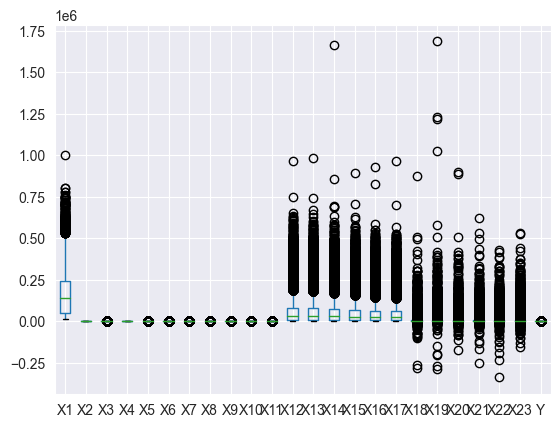

In [21]:
df.boxplot()
plt.show()

viendo tanto valores como maximos y minimos podemos concluir que necesitmos normalizart("escalar")las diferentes columnas para obtener mejores resultados


Realiza el conteo de las variables categóricas

Son 9 variables categoricas en este dataset, los cuales son los siguientes:

X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.

X2: Gender (1 = male; 2 = female).

X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

X4: Marital status (1 = married; 2 = single; 3 = others).

X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.



In [22]:
df['X2'].value_counts()

2.0    14706
1.0     9916
Name: X2, dtype: int64

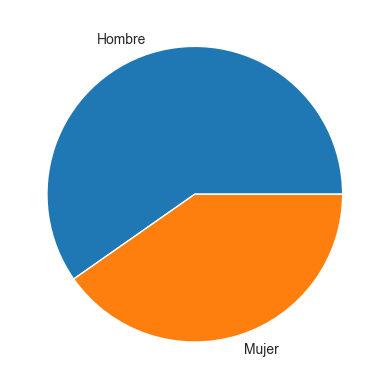

In [23]:
#fig = plt.figure(figsize =(10, 7))
plt.pie(df['X2'].value_counts(),labels=["Hombre","Mujer"])
plt.show()

In [24]:
df['X3'].value_counts()

2.0    11889
1.0     8345
3.0     4057
4.0      331
Name: X3, dtype: int64

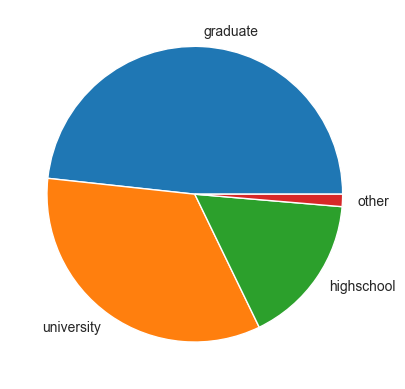

In [25]:
#fig = plt.figure(figsize =(10, 7))
plt.pie(df['X3'].value_counts(),labels=["graduate","university","highschool","other"])
plt.show()

In [26]:
df['X4'].value_counts()

2.0    13177
1.0    11168
3.0      277
Name: X4, dtype: int64

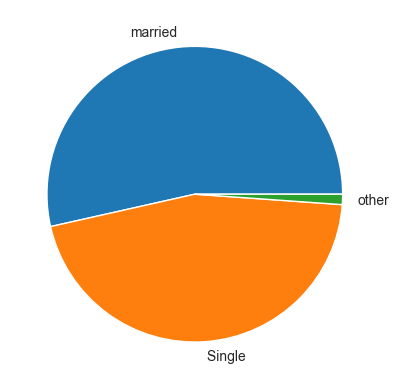

In [27]:
#fig = plt.figure(figsize =(10, 7))
plt.pie(df['X4'].value_counts(),labels=["married","Single ","other"])
plt.show()

In [28]:
trial=df['X5'].value_counts()
df['X5']=df['X5'].astype(int)
df['X5'].value_counts()

29    1301
27    1218
28    1175
30    1160
26    1066
25     991
31     960
32     957
24     942
34     941
33     928
35     910
36     881
37     854
23     816
39     782
38     752
40     706
41     684
42     656
44     571
43     541
45     513
22     473
46     471
47     408
48     383
49     368
50     338
51     273
53     265
52     246
54     205
55     173
56     152
57      99
58      98
59      68
60      54
61      42
21      36
62      33
64      24
63      23
66      19
65      17
67      14
69      12
70       8
68       5
71       3
72       2
73       2
79       1
75       1
74       1
Name: X5, dtype: int64

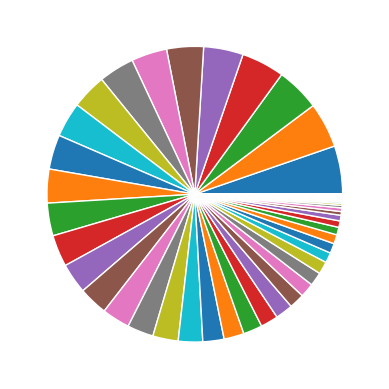

In [29]:
plt.pie(df['X5'].value_counts())
plt.show()

Como podemos observar utilizar un pie chart para los rangos de edades no nos funciona por lo cual se deberia utilizar algun otro ripode plot

In [30]:
#Valores atipicos antes de normalizar
def normalize(x):
    min = np.min(x)
    max = np.max(x)
    range = max - min
    return [((a - min) / range).round(2) for a in x]
MAX=np.max(df.X1)
MIN=np.min(df.X1)
print(MAX)
print(MIN)
1000000
10000
dfX1=df.X1
dft= dfX1.copy()
normalizedValues = normalize(dft)
dft=normalizedValues
#print(normalizedValues)
print(min(normalizedValues))
print(max(normalizedValues))
0.0
1.0
dfX5=df.X5
df5= dfX5.copy()
normalizedValues = normalize(df5)
df5=normalizedValues
df['X1']= dft
df['X5']= df5

print(df)

1000000
10000
0.0
1.0
         X1   X2   X3   X4    X5   X6   X7   X8   X9  X10  ...      X15  \
ID                                                         ...            
2      0.11  2.0  2.0  2.0  0.09 -1.0  2.0 -1.0 -1.0 -1.0  ...   3272.0   
3      0.08  2.0  2.0  2.0  0.22 -1.0 -1.0 -1.0 -1.0 -1.0  ...  14331.0   
4      0.04  2.0  2.0  1.0  0.28 -1.0 -1.0 -1.0 -1.0 -1.0  ...  28314.0   
5      0.04  1.0  2.0  1.0  0.62 -1.0 -1.0 -1.0 -1.0 -1.0  ...  20940.0   
6      0.04  1.0  1.0  2.0  0.28 -1.0 -1.0 -1.0 -1.0 -1.0  ...  19394.0   
...     ...  ...  ...  ...   ...  ...  ...  ...  ...  ...  ...      ...   
29995  0.07  1.0  2.0  2.0  0.22  2.0  2.0  2.0  2.0  2.0  ...  77519.0   
29996  0.21  1.0  3.0  1.0  0.31 -1.0 -1.0 -1.0 -1.0 -1.0  ...  88004.0   
29998  0.02  1.0  2.0  2.0  0.28  4.0  3.0  2.0 -1.0 -1.0  ...  20878.0   
29999  0.07  1.0  3.0  1.0  0.34  1.0 -1.0 -1.0 -1.0 -1.0  ...  52774.0   
30000  0.04  1.0  2.0  1.0  0.43 -1.0 -1.0 -1.0 -1.0 -1.0  ...  36535.0   

  

In [31]:
trans=df.drop(['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11'],
         axis = 1,
        )
print(trans)

            X12       X13       X14      X15      X16      X17      X18  \
ID                                                                        
2        2682.0    1725.0    2682.0   3272.0   3455.0   3261.0    957.0   
3       29239.0   14027.0   13559.0  14331.0  14948.0  15549.0   1518.0   
4       46990.0   48233.0   49291.0  28314.0  28959.0  29547.0   2000.0   
5        8617.0    5670.0   35835.0  20940.0  19146.0  19131.0   2000.0   
6       64400.0   57069.0   57608.0  19394.0  19619.0  20024.0   2500.0   
...         ...       ...       ...      ...      ...      ...      ...   
29995   72557.0   77708.0   79384.0  77519.0  82607.0  81158.0   7000.0   
29996  188948.0  192815.0  208365.0  88004.0  31237.0  15980.0   8500.0   
29998    3565.0    3356.0    2758.0  20878.0  20582.0  19357.0    209.0   
29999    1645.0   78379.0   76304.0  52774.0  11855.0  48944.0  85900.0   
30000   47929.0   48905.0   49764.0  36535.0  32428.0  15313.0   2078.0   

           X19      X20 

In [32]:
trans=((trans-MIN)/ (MAX-MIN)).round(3)
print(trans)

         X12    X13    X14    X15    X16    X17    X18    X19    X20    X21  \
ID                                                                            
2     -0.007 -0.008 -0.007 -0.007 -0.007 -0.007 -0.009 -0.009 -0.009 -0.009   
3      0.019  0.004  0.004  0.004  0.005  0.006 -0.009 -0.009 -0.009 -0.009   
4      0.037  0.039  0.040  0.018  0.019  0.020 -0.008 -0.008 -0.009 -0.009   
5     -0.001 -0.004  0.026  0.011  0.009  0.009 -0.008  0.027  0.000 -0.001   
6      0.055  0.048  0.048  0.009  0.010  0.010 -0.008 -0.008 -0.009 -0.009   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
29995  0.063  0.068  0.070  0.068  0.073  0.072 -0.003 -0.007 -0.008 -0.003   
29996  0.181  0.185  0.200  0.079  0.021  0.006 -0.002  0.010 -0.005 -0.007   
29998 -0.006 -0.007 -0.007  0.011  0.011  0.009 -0.010 -0.009  0.012 -0.006   
29999 -0.008  0.069  0.067  0.043  0.002  0.039  0.077 -0.007 -0.009 -0.008   
30000  0.038  0.039  0.040  0.027  0.023  0.005 -0.0

In [33]:
df['X12'] =trans['X12']
df['X13'] =trans['X13']
df['X14'] =trans['X14']
df['X15'] =trans['X15']
df['X16'] =trans['X16']
df['X17'] =trans['X17']
df['X18'] =trans['X18']
df['X19'] =trans['X19']
df['X20'] =trans['X20']
df['X21'] =trans['X21']
df['X22'] =trans['X22']
df['X23'] =trans['X23']

print(df)

         X1   X2   X3   X4    X5   X6   X7   X8   X9  X10  ...    X15    X16  \
ID                                                         ...                 
2      0.11  2.0  2.0  2.0  0.09 -1.0  2.0 -1.0 -1.0 -1.0  ... -0.007 -0.007   
3      0.08  2.0  2.0  2.0  0.22 -1.0 -1.0 -1.0 -1.0 -1.0  ...  0.004  0.005   
4      0.04  2.0  2.0  1.0  0.28 -1.0 -1.0 -1.0 -1.0 -1.0  ...  0.018  0.019   
5      0.04  1.0  2.0  1.0  0.62 -1.0 -1.0 -1.0 -1.0 -1.0  ...  0.011  0.009   
6      0.04  1.0  1.0  2.0  0.28 -1.0 -1.0 -1.0 -1.0 -1.0  ...  0.009  0.010   
...     ...  ...  ...  ...   ...  ...  ...  ...  ...  ...  ...    ...    ...   
29995  0.07  1.0  2.0  2.0  0.22  2.0  2.0  2.0  2.0  2.0  ...  0.068  0.073   
29996  0.21  1.0  3.0  1.0  0.31 -1.0 -1.0 -1.0 -1.0 -1.0  ...  0.079  0.021   
29998  0.02  1.0  2.0  2.0  0.28  4.0  3.0  2.0 -1.0 -1.0  ...  0.011  0.011   
29999  0.07  1.0  3.0  1.0  0.34  1.0 -1.0 -1.0 -1.0 -1.0  ...  0.043  0.002   
30000  0.04  1.0  2.0  1.0  0.43 -1.0 -1

Con esto ya tenemos una DF normalizado y escalado para poder trabajar con los mismos datos podemos observar tambien si  volvemos a describir como los datos mantienen  la escencia

In [34]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,24622.000000,24622.000000,24622.000000,24622.000000,24622.000000,24622.000000,24622.000000,24622.000000,24622.000000,24622.000000,...,24622.000000,24622.000000,24622.000000,24622.000000,24622.000000,24622.000000,24622.000000,24622.000000,24622.000000,24622.000000
mean,0.156475,1.597271,1.852733,1.557672,0.248449,-0.469418,-0.491837,-0.524368,-0.594022,-0.647145,...,0.041998,0.038727,0.037346,-0.003425,-0.003029,-0.003717,-0.004195,-0.004237,-0.001378,0.215986
std,0.131709,0.490457,0.731986,0.518830,0.158863,1.138449,1.188977,1.139527,1.058652,0.993795,...,0.068355,0.064569,0.063191,0.018238,0.025720,0.019527,0.017365,0.017003,0.024464,0.411513
min,0.000000,1.000000,1.000000,1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.010000,-0.010000,-0.010000,-0.294000,-0.301000,-0.184000,-0.263000,-0.353000,-0.167000,0.000000
25%,0.040000,1.000000,1.000000,1.000000,0.120000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.001000,-0.002000,-0.003000,-0.009000,-0.009000,-0.009000,-0.009000,-0.009000,-0.009000,0.000000
50%,0.130000,2.000000,2.000000,2.000000,0.220000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,0.017000,0.015000,0.014000,-0.007000,-0.007000,-0.008000,-0.008000,-0.008000,-0.008000,0.000000
75%,0.230000,2.000000,2.000000,2.000000,0.340000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,0.059000,0.053000,0.051000,-0.004000,-0.004000,-0.005000,-0.005000,-0.005000,-0.004000,0.000000
max,1.000000,2.000000,4.000000,3.000000,1.000000,8.000000,8.000000,8.000000,8.000000,7.000000,...,0.890000,0.926000,0.961000,0.872000,1.691000,0.895000,0.617000,0.421000,0.524000,1.000000


Como podemos ver ahora todos los datos estan dentro de los mismos rangos y podemos hacer mas cosas con ellos

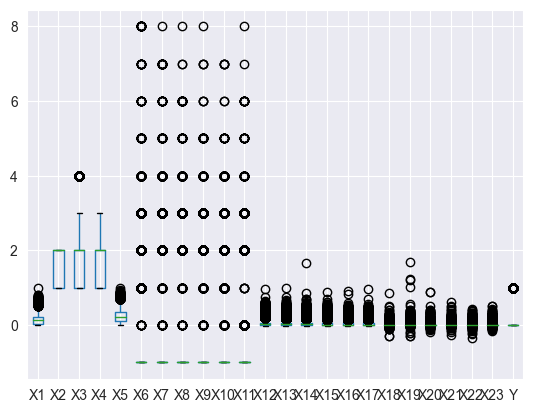

In [35]:
df.boxplot()
plt.show()

### aun podemos ver que los datos aun que estan dentro de los mismos parametros aun tenemos variaciones entre ellos mismos

Reduce las dimensiones con PCA, si consideras necesario.
Indica la varianza de los datos explicada por cada componente seleccionado. Para actividades de exploración de los datos la varianza > 70%
Indica la importancia de las variables en cada componente
Elabora los histogramas de los atributos para visualizar su distribución
Realiza la visualización de los datos usando por lo menos 3 gráficos que consideres adecuados: plot, scatter, jointplot, boxplot, areaplot, pie chart, pairplot, bar chart, etc.
Interpreta y explica cada uno de los gráficos indicando cuál es la información más relevante que podría ayudar en el proceso de toma de decisiones.

In [36]:
pcs = PCA()
pcs.fit(df.iloc[:, 0:].dropna(axis=0))
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                             'Proportion of variance': pcs.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                             })
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Standard deviation,2.109118,1.038241,0.800069,0.740344,0.660545,0.550511,0.511531,0.508294,0.488893,0.363283,...,0.029678,0.023932,0.021420,0.020804,0.018783,0.017561,0.013829,0.012535,0.011069,0.010400
Proportion of variance,0.528808,0.128142,0.076094,0.065157,0.051868,0.036027,0.031106,0.030713,0.028413,0.015689,...,0.000105,0.000068,0.000055,0.000051,0.000042,0.000037,0.000023,0.000019,0.000015,0.000013
Cumulative proportion,0.528808,0.656950,0.733044,0.798201,0.850070,0.886097,0.917202,0.947915,0.976329,0.992018,...,0.999678,0.999747,0.999801,0.999853,0.999895,0.999931,0.999954,0.999973,0.999987,1.000000


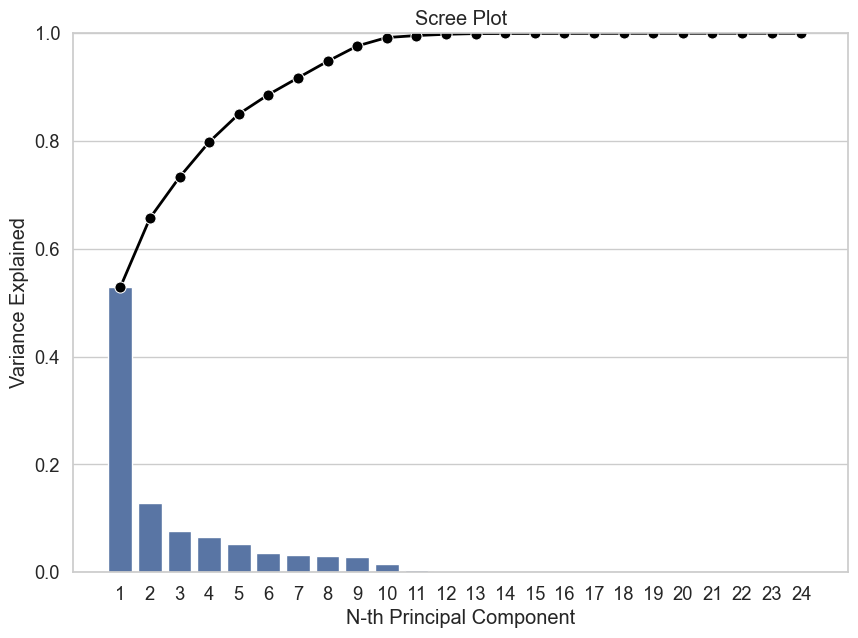

In [37]:
PC_components = np.arange(pcs.n_components_) + 1
#PC_components

_ = sns.set(style='whitegrid',
            font_scale=1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x=PC_components,
                y=pcs.explained_variance_ratio_,
                color='b'
                )

_ = sns.lineplot(x=PC_components - 1,
                 y=np.cumsum(pcs.explained_variance_ratio_),
                 color='black',
                 linestyle='-',
                 linewidth=2,
                 marker='o',
                 markersize=8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

viendo esta grafica podemos visualizar como podriamos trabajr con 9 componentes obteniendo el 90 % de los datos

In [38]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(),
                                columns=pcsSummary_df.columns,
                                index=df.iloc[:, 0:].columns
                                )
pcsComponents_df.iloc[:,:8]

,0,1,2,3,4,5,6,7
X1,-0.015703,0.000207,-0.004363,-0.033276,-0.005912,0.005735,-0.045880,-0.009815
X2,-0.009489,0.003455,0.000845,0.035328,0.006152,0.004662,-0.221207,0.087270
X3,0.025850,-0.046715,0.034192,0.967995,0.090083,0.007206,0.214696,0.041775
X4,-0.003635,0.007363,-0.004963,-0.211394,-0.014214,-0.052719,0.930022,0.169014
X5,-0.000811,-0.003042,0.000350,0.055138,0.001900,0.006722,-0.105661,-0.022784
X6,0.427964,-0.486747,0.372508,-0.011440,-0.278401,-0.546012,0.001254,-0.181337
X7,0.477879,-0.458185,0.090319,-0.062807,0.121871,0.667064,-0.018096,0.292540
X8,0.446225,-0.026821,-0.649457,-0.029534,0.487889,-0.201766,0.035545,-0.307560
X9,0.397219,0.330530,-0.373309,0.068719,-0.563836,-0.119791,-0.080621,0.496670
X10,0.352395,0.458903,0.211182,0.027630,-0.272137,0.368268,0.117516,-0.623609


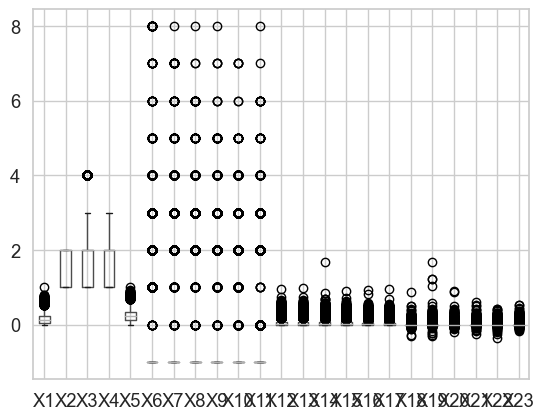

In [39]:
df.iloc[:,0:23].boxplot()
plt.show()

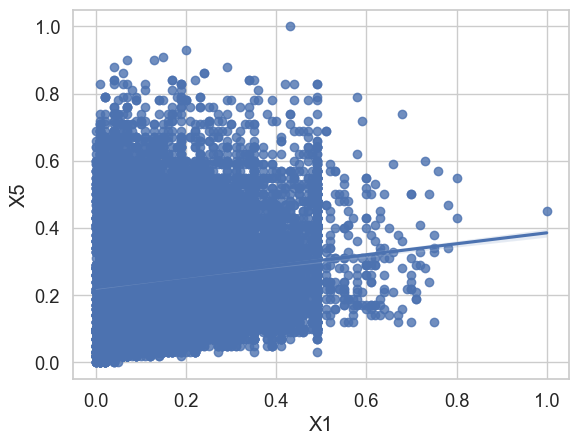

In [40]:
p = sns.regplot(data = df,
                x = df.X1,
                y = df.X5
               )
plt.show()


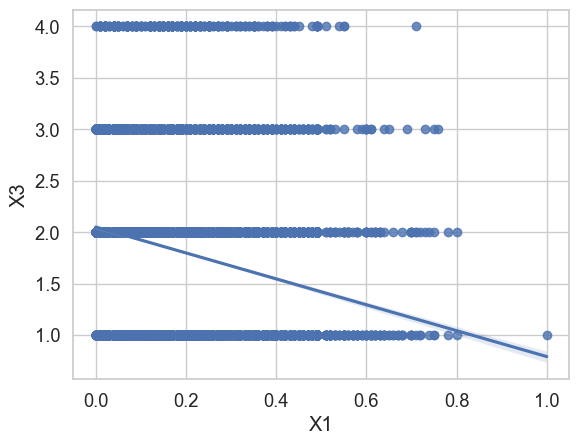

In [41]:
graph2 = sns.regplot(data = df,
                x = df.X1,
                y = df.X3
               )
plt.show()



Usemos tecnicas mas avanxadas para comprobar como funciona esto y verificar cuantos datos requierimos realemnente


In [42]:
pcs = PCA(n_components=9)

pcs.fit(df[['X1', 'X2',"X3","X4","X5","X6","X7","X8","X9"]])

pcsSummary = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                          'Proportion of variance': pcs.explained_variance_ratio_,
                          'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)#column
                          }
                          )
pcsSummary

,Standard deviation,Proportion of variance,Cumulative proportion
0,1.901948,0.581846,0.581846
1,0.893562,0.128428,0.710274
2,0.740033,0.088087,0.798362
3,0.655940,0.069205,0.867567
4,0.536531,0.046302,0.913869
5,0.511199,0.042033,0.955902
6,0.489020,0.038465,0.994367
7,0.144509,0.003359,0.997726
8,0.118903,0.002274,1.000000


In [43]:
pcsSummary = pcsSummary.transpose()
pcsSummary.round(2)

,0,1,2,3,4,5,6,7,8
Standard deviation,1.90,0.89,0.74,0.66,0.54,0.51,0.49,0.14,0.12
Proportion of variance,0.58,0.13,0.09,0.07,0.05,0.04,0.04,0.00,0.00
Cumulative proportion,0.58,0.71,0.80,0.87,0.91,0.96,0.99,1.00,1.00


In [44]:
pcsSummary.columns = ['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9']
pcsSummary = pcsSummary.round(4)
pcsSummary

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
Standard deviation,1.9019,0.8936,0.7400,0.6559,0.5365,0.5112,0.4890,0.1445,0.1189
Proportion of variance,0.5818,0.1284,0.0881,0.0692,0.0463,0.0420,0.0385,0.0034,0.0023
Cumulative proportion,0.5818,0.7103,0.7984,0.8676,0.9139,0.9559,0.9944,0.9977,1.0000


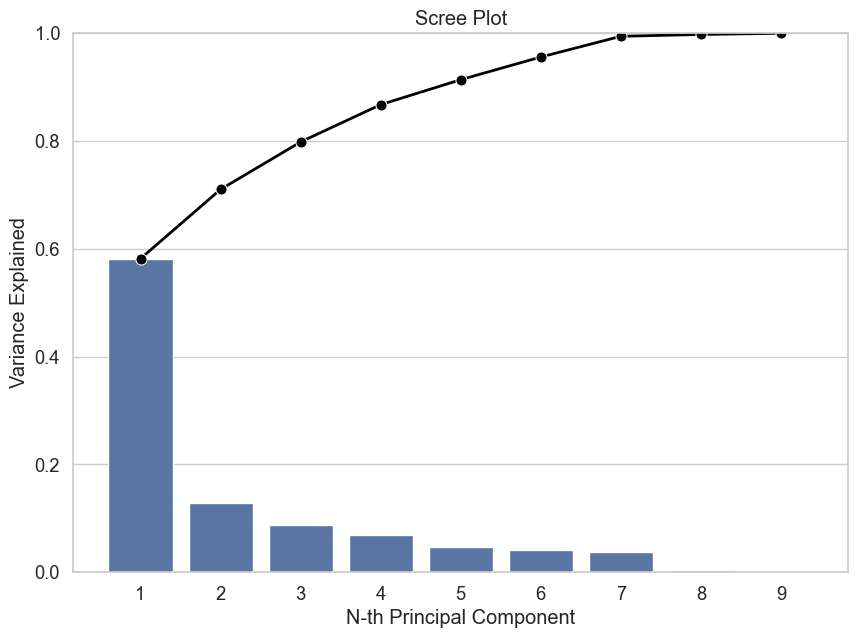

In [45]:
PC_components = np.arange(pcs.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid',
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components,
                y = pcs.explained_variance_ratio_,
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1,
                 y = np.cumsum(pcs.explained_variance_ratio_),
                 color = 'black',
                 linestyle = '-',
                 linewidth = 2,
                 marker = 'o',
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

podemos ver que con 7 datos podriamos obtener un buen resultado sin embargo comprobemos essta teoria

Como se puede observar el primer componente es el que tiene mayor varianza y aun aciendo el PCa se mantiene siendo el coponente mas improtante

In [46]:
pcs = PCA()
pcs.fit(df.iloc[:, 0:13].dropna(axis=0))
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                             'Proportion of variance': pcs.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                             })
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df

,0,1,2,3,4,5,6,7,8,9,10,11,12
Standard deviation,2.102017,1.037516,0.799038,0.740323,0.660307,0.547441,0.511449,0.507600,0.488771,0.147215,0.128192,0.090987,0.015878
Proportion of variance,0.537402,0.130923,0.077654,0.066661,0.053030,0.036450,0.031815,0.031338,0.029056,0.002636,0.001999,0.001007,0.000031
Cumulative proportion,0.537402,0.668325,0.745978,0.812639,0.865668,0.902119,0.933934,0.965272,0.994328,0.996964,0.998962,0.999969,1.000000


In [47]:
pcsComponents_dfX = pd.DataFrame(pcs.components_.transpose(),
                                columns = pcsSummary_df.columns,
                                index = df.iloc[:, 0:13].columns
                                )
pcsComponents_dfX

,0,1,2,3,4,5,6,7,8,9,10,11,12
X1,-0.015680,0.000122,-0.004109,-0.033201,-0.006055,0.004965,-0.045145,-0.013001,0.007614,0.505309,0.642301,-0.573075,-0.002326
X2,-0.009450,0.003336,0.001243,0.035397,0.005575,-0.003098,-0.228768,0.061581,-0.969908,0.034642,-0.022450,0.007233,0.000287
X3,0.025860,-0.046683,0.033424,0.968206,0.088852,0.002020,0.212071,0.052958,-0.012492,-0.001305,0.046082,-0.025544,-0.000559
X4,-0.003558,0.007166,-0.004192,-0.211392,-0.014605,-0.068925,0.918409,0.215840,-0.204914,0.126611,-0.046055,-0.008014,0.000135
X5,-0.000828,-0.003008,0.000200,0.055148,0.001945,0.008895,-0.103949,-0.027504,0.067209,0.798599,-0.582856,0.057486,0.000702
X6,0.428403,-0.487041,0.374555,-0.010709,-0.278912,-0.561603,0.003312,-0.212491,-0.019858,0.001618,-0.000126,-0.010230,0.000507
X7,0.479454,-0.461369,0.098800,-0.061539,0.115075,0.655880,-0.027894,0.314933,0.016815,0.004822,0.004874,-0.000897,-0.001173
X8,0.448118,-0.030384,-0.647763,-0.030486,0.491380,-0.187749,0.050737,-0.311798,-0.034668,0.005050,0.003622,-0.001551,0.001305
X9,0.399051,0.328426,-0.374940,0.067750,-0.563012,-0.138757,-0.109061,0.486568,0.053001,0.002245,0.005622,-0.000801,-0.000019
X10,0.353939,0.458282,0.211122,0.028043,-0.274601,0.382384,0.154223,-0.606473,-0.078183,0.003300,0.001234,-0.001647,0.000023


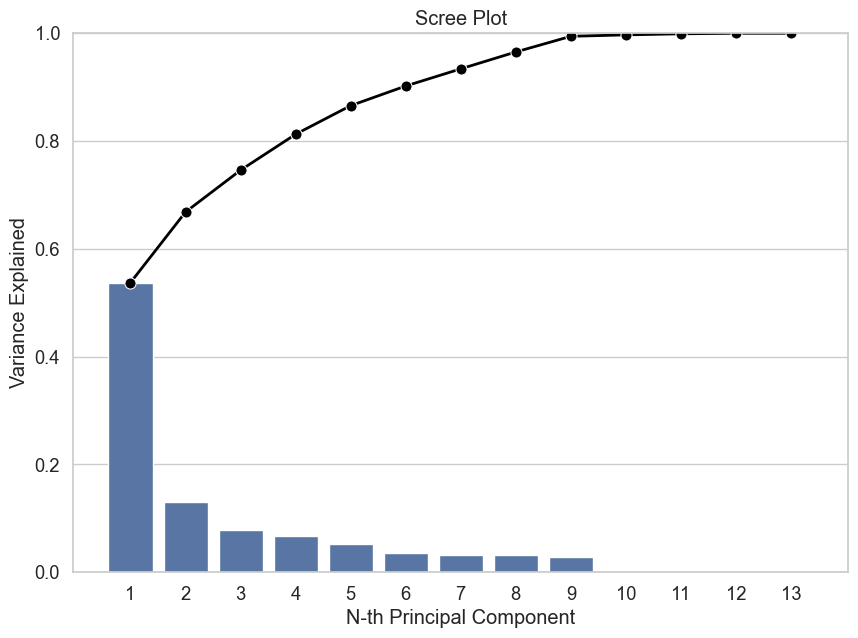

In [48]:
PC_components = np.arange(pcs.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid',
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components,
                y = pcs.explained_variance_ratio_,
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1,
                 y = np.cumsum(pcs.explained_variance_ratio_),
                 color = 'black',
                 linestyle = '-',
                 linewidth = 2,
                 marker = 'o',
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

con esto comprobamos que los necesitamos 9 valores princiapales para tener mas del 90 % de los valores

In [49]:
((pcsSummary_df.iloc[2][5])*100).round(0)

90.0

Vemos con esto que con 5 componentes podriamos tener mas del 90% de la variacion

In [50]:
from sklearn import preprocessing

Usando una formula directa con procedaro podemo enconterar cual es el componente mas importante

In [51]:
df.iloc[:, 0:13].head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13
ID,,,,,,,,,,,,,
2,0.11,2.0,2.0,2.0,0.09,-1.0,2.0,-1.0,-1.0,-1.0,2.0,-0.007,-0.008
3,0.08,2.0,2.0,2.0,0.22,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.019,0.004
4,0.04,2.0,2.0,1.0,0.28,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.037,0.039
5,0.04,1.0,2.0,1.0,0.62,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.001,-0.004
6,0.04,1.0,1.0,2.0,0.28,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.055,0.048


In [52]:
pcs = PCA()
pcs.fit(preprocessing.scale(df.iloc[:, 0:9].dropna(axis=0)))

PCA()

In [53]:
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                             'Proportion of variance': pcs.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                             })

pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
Standard deviation,1.7009,1.2395,1.0688,1.0061,0.8153,0.7984,0.7432,0.5909,0.4611
Proportion of variance,0.3215,0.1707,0.1269,0.1125,0.0739,0.0708,0.0614,0.0388,0.0236
Cumulative proportion,0.3215,0.4921,0.6191,0.7315,0.8054,0.8762,0.9376,0.9764,1.0000


In [54]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(),
                                columns=pcsSummary_df.columns,
                                index=df.iloc[:,0:9].columns
                                )

In [55]:
pcsSummary_df.iloc[0,8]

0.46106291329105265

In [56]:
pcsComponents_df.PC1.idxmax()

'X7'

In [57]:
pcsComponents_df.PC1.nlargest(3)

X7    0.513858
X8    0.494360
X6    0.484170
Name: PC1, dtype: float64

In [58]:
pcsComponents_df.PC2.idxmin()

'X4'

In [59]:
pcsComponents_df.PC2.nsmallest(3)

X4   -0.634585
X2   -0.068955
X8   -0.007879
Name: PC2, dtype: float64

Analizanfo los datos finales

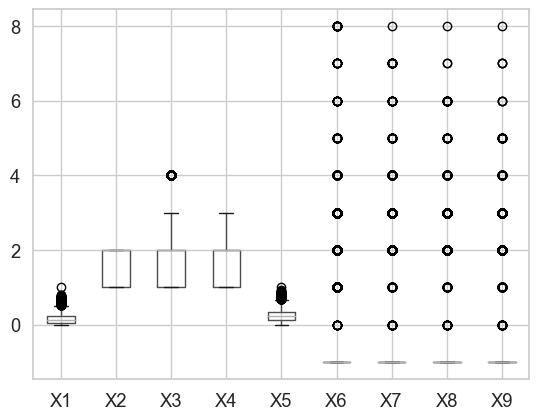

In [60]:
df.iloc[:,0:9].boxplot()
plt.show()

estas graficas nos demuestra como se comportan los primeros nueve componentes los culaes son los mas importantes  para este etudio y con ellos podemos trabajar todos los puntos

en la siguiente grafica vamos a ver como incluisve podriamos trabajr con 5 compoentes los cuales podemos verificar que forma parte de los  mas improtantes a un menteniendo una varianza arriba del 85%

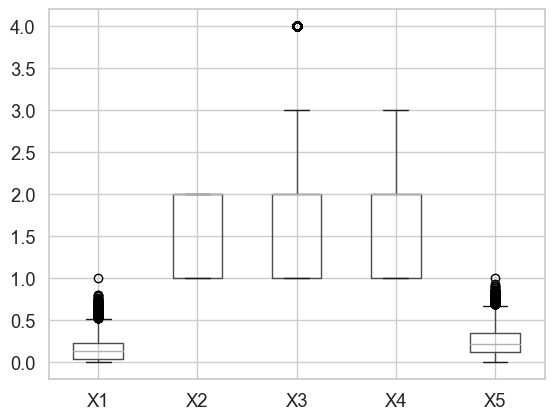

In [61]:
df.iloc[:,0:5].boxplot()
plt.show()

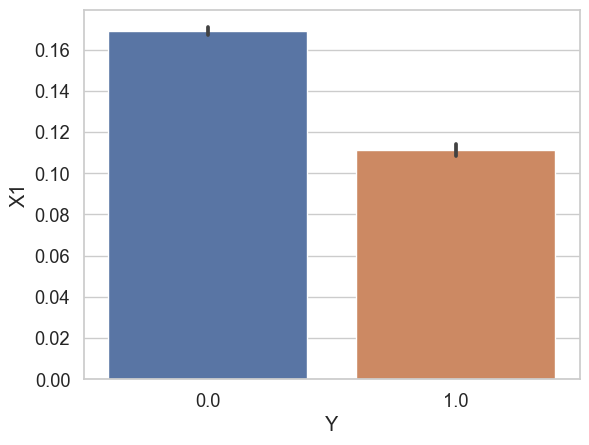

In [62]:
pagado = sns.barplot(data = df,
                x = df.Y,
                y = df.X1
               )
pagado
plt.show()


Con este grafico podemos observar que la mayoria de gente que no pago es gente que pidio una cantidad muy grande de dinero

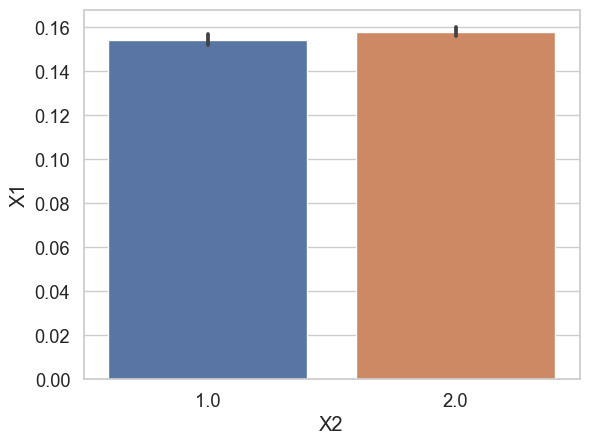

In [63]:
sns.barplot(data=df,y=df.X1,x=df.X2)
plt.show()

Un dato interesante para el estudio seria que se han pedido mas prestamos por mujeres que por hombres

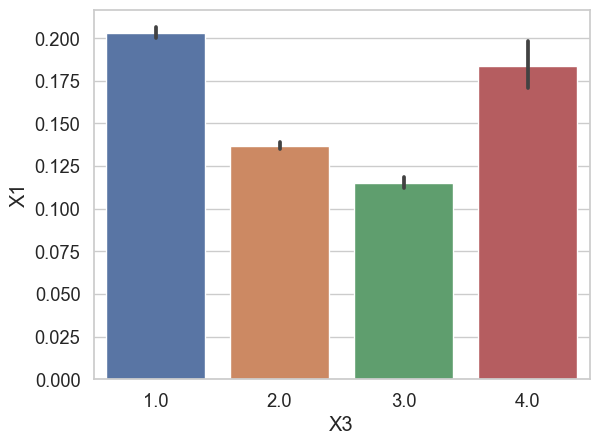

In [64]:
sns.barplot(data=df,y=df.X1,x=df.X3)
plt.show()

igualmente la mayor cantida de dinero a sido pedida por Graduados de universidad lo cual nos podria decir que son prestamos educativos

Basandonos en la pregunta anterior
usando los valores anteriores
veamos el estado marital de los que pidieron el prestamo y su grado escolar

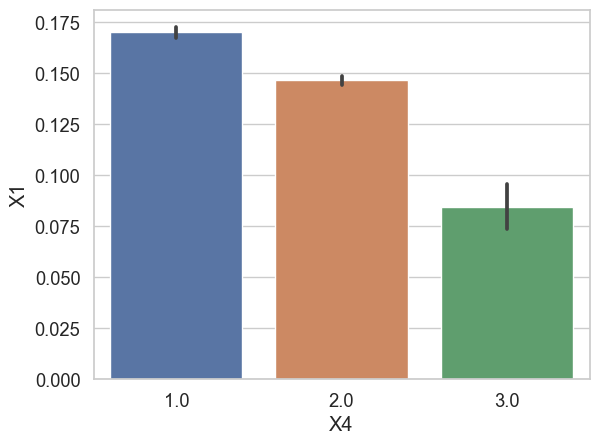

In [65]:
sns.barplot(data=df.X1,y=df.X1,x=df.X4)
plt.show()

Podemos ver que la mayoria de los que pidieron el prestamos son casados

Como conclusion final podemos decidir que el usar entre 7 y 9 componentes representan la suficiente informacion para obtener un buen modelo de datos en el estudio

los datos arrojados por las graficas son interesantes ya que eston nos ayudan a entender mas como los prestamos estan relacionaados a los eventos que tambien ocurren a lo largo de nuestras vidas ya que tambien podemos ver que la mayoria de los prestamos tambien son para gente joven y despues para gente en e su apojeo lo cual puede indicar tambien que estan pidiendo para un negocio

se necesita profundisar un poco mas en los datos para tener un historia mas fiable.